In [ ]:
import pandas as pd
from pandas import read_csv
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Task 1: Utilize Libraries/Dataset
def load_and_explore_data(file_path):
    """
    Load the dataset and perform basic exploration

    Parameters:
    file_path (str): Path to the customer data CSV file

    Returns:
    pandas.DataFrame: The loaded customer data
    """
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display dataset info
    print("\nDataset Information:")
    print(df.info())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(df.describe())

    return df
df = load_and_explore_data('sample_data/enhanced_diabetes_dataset.csv')

First 5 rows of the dataset:
   Age  Gender  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0   52       1            1      124           95.0           20.0        0   
1   43       1            2      144           86.0           23.0        3   
2   55       1            4      141          113.0           18.0      297   
3   68       1            3      125          110.0           32.0      210   
4   41       0            0      177           92.0           14.0      189   

    BMI  DiabetesPedigreeFunction  HbA1c  FastingBS  Triglycerides   HDL  \
0  36.0                     0.078    4.7         87          142.0  37.0   
1  32.9                     0.118    6.3        135          162.0  89.0   
2  43.4                     0.139    5.4        113          180.0  45.0   
3  22.7                     0.197    5.2         93          262.0  56.0   
4  38.1                     0.078   10.5        126          332.0  66.0   

   Smoking  PhysicalActivity  Prediabet

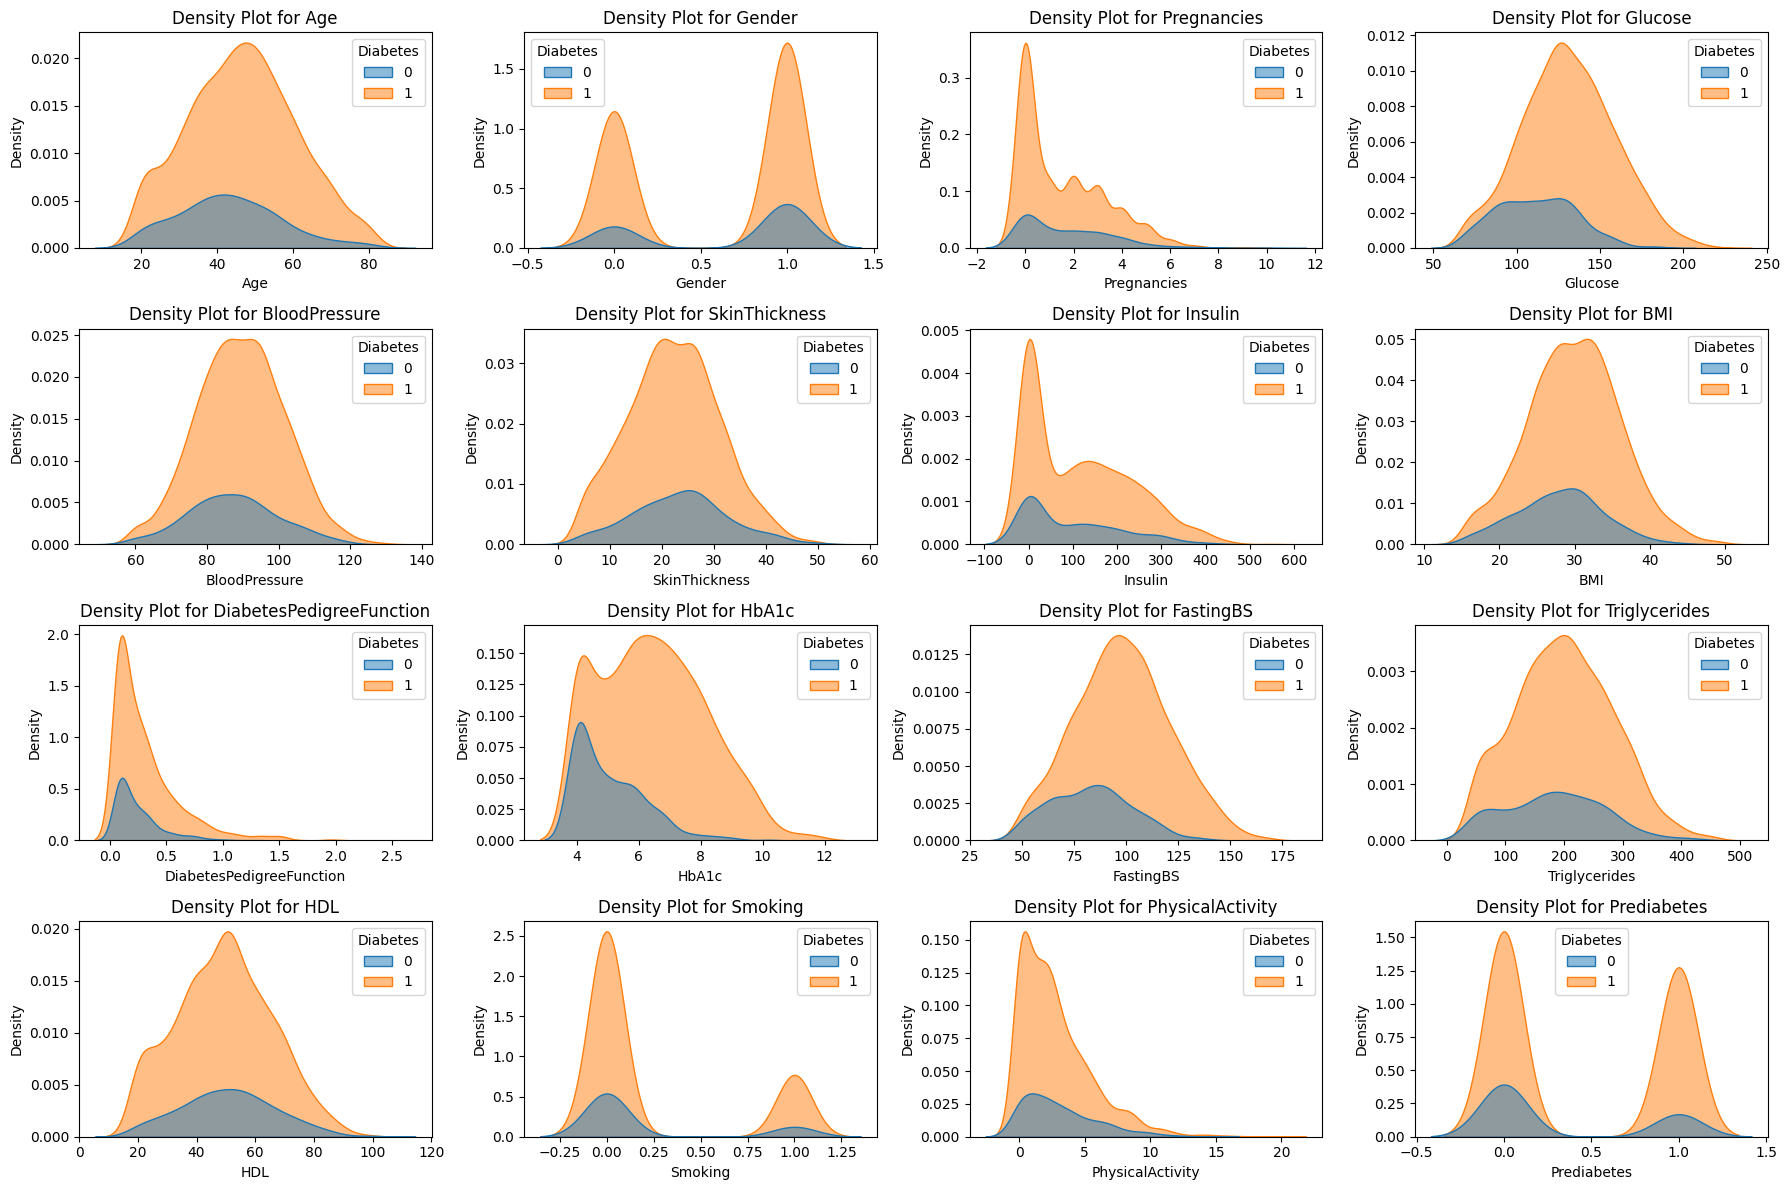

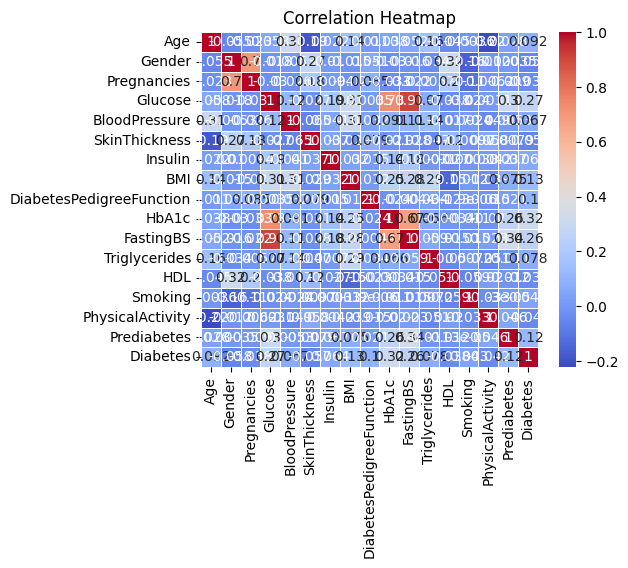

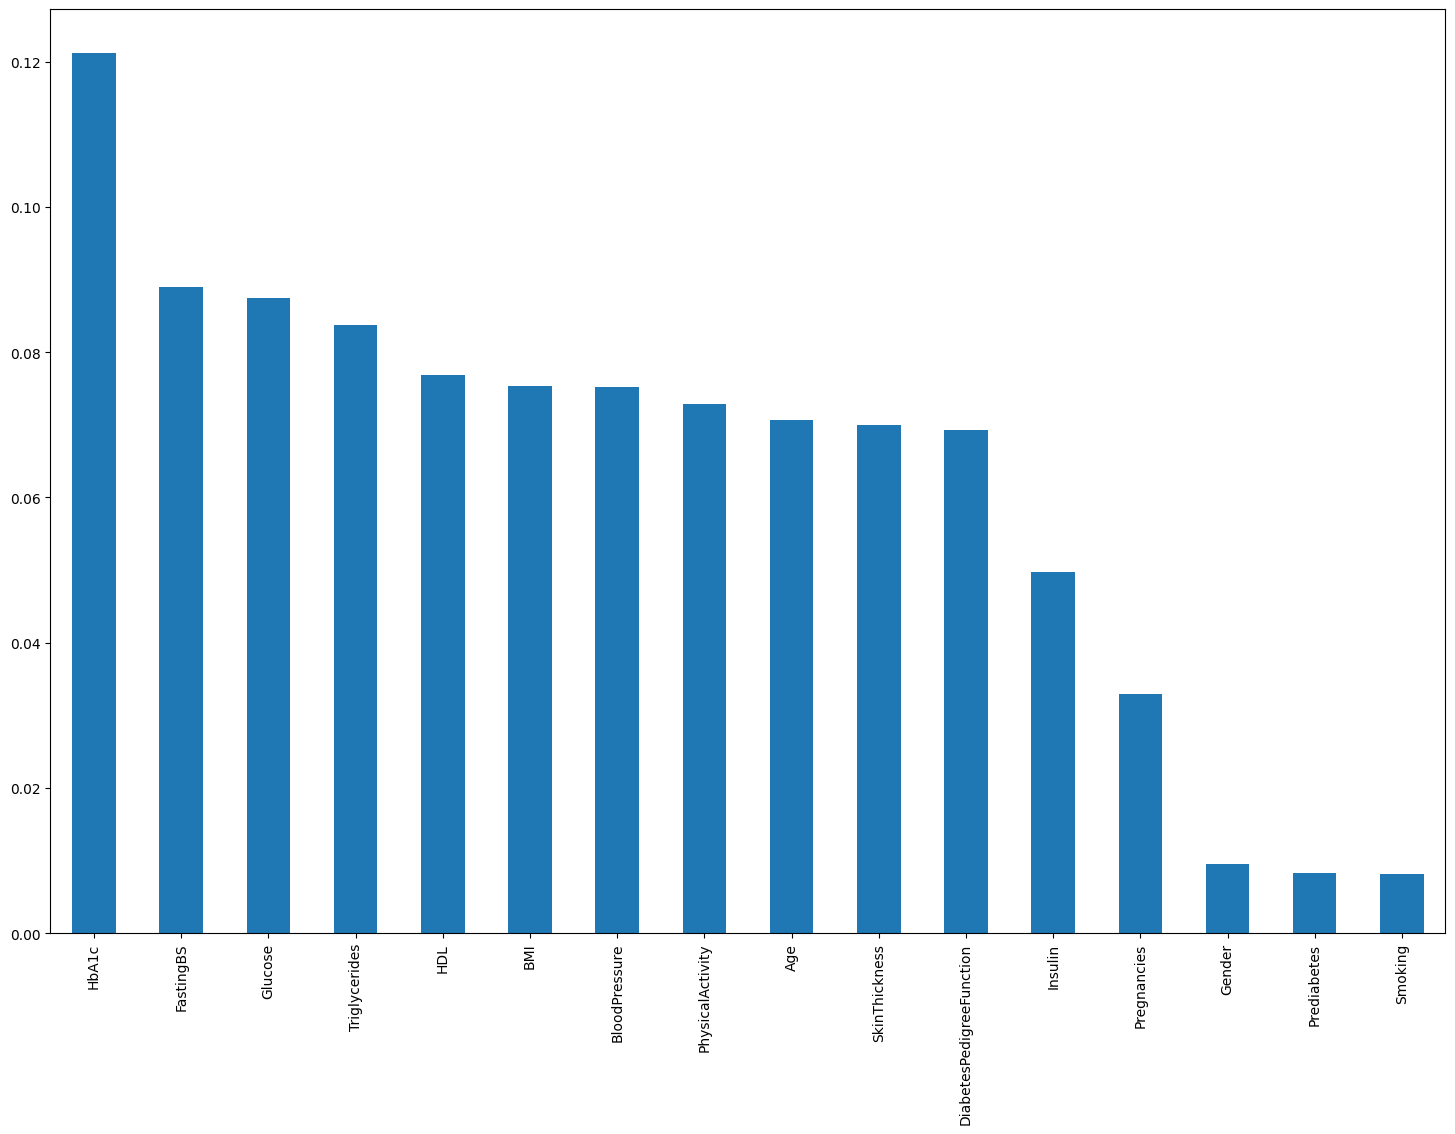

In [ ]:
# Task 2: Data Visualization - EDA
def perform_eda(df):
    """
    Perform Exploratory Data Analysis on the Patient dataset

    Parameters:
    df (pandas.DataFrame): Patient dataset
    """

    # 1. Create distribution plots comparing features between diabetic and non-diabetic patients
    plt.figure(figsize=(18, 12))
    for i, column in enumerate(df.columns[:16]):  # Skip Label column
      plt.subplot(4, 4, i+1)
      sns.kdeplot(data=df, x= column, hue='Diabetes', fill=True, alpha=0.5)
      plt.title(f'Density Plot for {column}')
      plt.xlabel(f'{column}')
      plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

    # 2. Correlation heatmap
    plt.figure(figsize=(25, 20))
    plt.subplot(4, 4, 4)
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')

    # 3. Visualise feature importance using appropriate techniques
    # Create a figure for distribution plots
    plt.figure(figsize=(18, 12))
    model = RandomForestClassifier()
    X = df.iloc[:, :-1]
    y = df['Diabetes']

    model.fit(X, y)

    (pd.Series(model.feature_importances_, index=X.columns)
      .nlargest(16)
      .plot(kind='bar'))


perform_eda(df)

Missing values in each column:
Age                           0
Gender                        0
Pregnancies                   0
Glucose                       0
BloodPressure                98
SkinThickness                86
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
HbA1c                         0
FastingBS                     0
Triglycerides                91
HDL                          96
Smoking                       0
PhysicalActivity            101
Prediabetes                   0
Diabetes                      0
dtype: int64

Age - Lower Bound: 7.5, Upper Bound: 83.5
Age - Outliers detected:
Empty DataFrame
Columns: [Age, Gender, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, HbA1c, FastingBS, Triglycerides, HDL, Smoking, PhysicalActivity, Prediabetes, Diabetes]
Index: []

Gender - Lower Bound: -1.5, Upper Bound: 2.5
Gender - Outliers detected:
Empty DataFrame
Columns: [Age, Gender, Pr

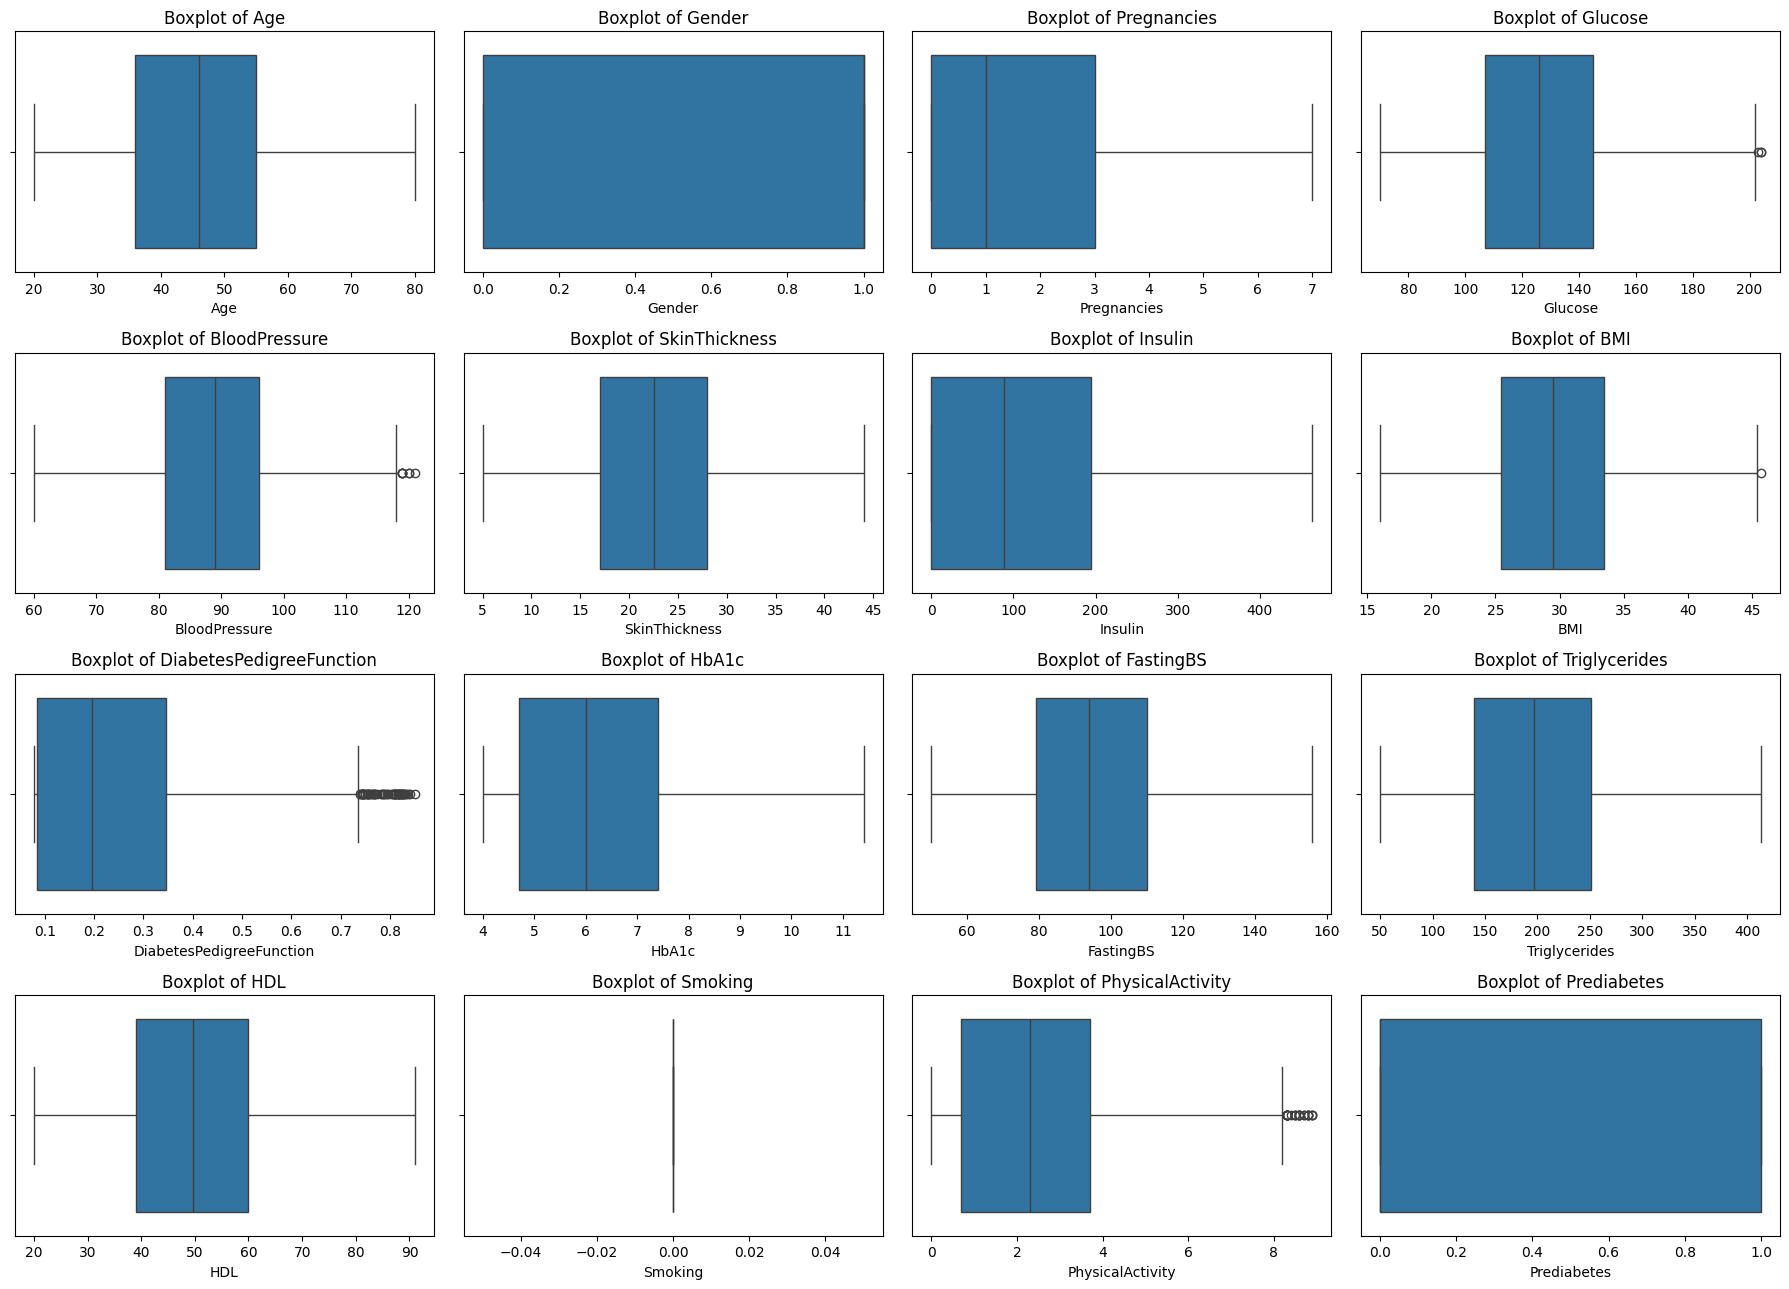

In [ ]:
# Task 3: Check for missing values and handle outliers
from scipy import stats

def check_data_quality(df):
    """
    Check for missing values and outliers in the dataset

    Parameters:
    df (pandas.DataFrame): Customer dataset

    Returns:
    pandas.DataFrame: DataFrame with outliers handled (if any)
    """
    # Check for missing values
    print("Missing values in each column:")
    print(df.isnull().sum())
    # Fill null values with mean
    df = df.fillna(df.mean(numeric_only=True))

    # Visualize outliers using boxplots
    # plt.figure(figsize=(18, 13))
    # for i, column in enumerate(df.columns[:-1]):  # Skip Label column
    #     plt.subplot(4, 4, i+1)
    #     sns.boxplot(x=df[column])
    #     plt.title(f'Boxplot of {column}')

    # plt.tight_layout()
    # plt.show()

    # Handle outliers
    df = findAndHandleOutliers(df)

    plt.figure(figsize=(18, 13))
    for i, column in enumerate(df.columns[:-1]):  # Skip Label column
        plt.subplot(4, 4, i+1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()
    return df

def findAndHandleOutliers(df):
  for i, column in enumerate(df.columns[:-1]):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds (1.5 * IQR is a common threshold)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"\n{column} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Create a boolean mask for outliers
    # Values outside the bounds will be True (outlier)
    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    print(f"{column} - Outliers detected:\n{df[outliers_mask]}")
    # Calculate the median of non-outlier values
    median_value = df[~outliers_mask][column].median()

    # Impute the outliers with the calculated median value
    df.loc[outliers_mask, column] = median_value
  print(df)
  return df

df = check_data_quality(df)


In [ ]:
# Task 4: Prepare Features and Target Variable
#The recommended, standard workflow is: Split -> Normalize -> SMOTE. Normalization and upsampling should happen only on training data so the test data does not influence training

X = df.drop(columns = ['Diabetes'])
y = df['Diabetes']

#Split data into training (70%), validation (15%), and test (15%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
# 0.15 (desired validation size) / 0.85 (remaining data size) = ~0.17647
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17, random_state=0)

#Normalize
scaler_X = MinMaxScaler()
Xt = scaler_X.fit_transform(X_train)
Xv = scaler_X.transform(X_val)
Xtr = scaler_X.transform(X_test)

print(Xt.shape, y_train.shape)
print(Xt)
print(y_train)


(1411, 16) (1411,)
[[0.26666667 0.         0.         ... 0.         0.1011236  0.        ]
 [0.25       0.         0.         ... 0.         0.61797753 0.        ]
 [0.8        1.         0.57142857 ... 0.         0.         0.        ]
 ...
 [0.33333333 0.         0.         ... 0.         0.5505618  0.        ]
 [0.5        1.         0.28571429 ... 0.         0.37078652 1.        ]
 [0.75       1.         0.         ... 0.         0.01123596 1.        ]]
401     0
1156    1
1078    1
1098    1
992     1
       ..
1481    1
947     1
910     1
1700    1
1410    1
Name: Diabetes, Length: 1411, dtype: int64


In [ ]:
#Task 5: Class Imbalance

from imblearn.over_sampling import SMOTE
from collections import Counter

class_inf = Counter(y_train)
print(class_inf)
print(Xt.shape)
#Upsampling to balance no of normal vs diabetic samples
sm = SMOTE()
Xts,yts = sm.fit_resample(Xt, y_train)

class_inf = Counter(yts)
print(class_inf)
print(Xts.shape)



Counter({1: 1140, 0: 271})
(1411, 16)
Counter({0: 1140, 1: 1140})
(2280, 16)


In [ ]:
#Task 6: Design an Appropriate DCNN-based Architecture and Task 7: Configure
from keras.optimizers import Adam
from keras.regularizers import l1
def baseline_model(filters, lr):
    # create model
    model = Sequential()
    #Not adding any convolutional layers as the input is not spatial data.
    #Not adding pooling as there is no need for dimensionality reduction
    #flatten layer is not required as input is acceptable vector
    #l1 regularizer to handle weights for sparse data
    #l2 regularizer to handle weights for stability
    model.add(Dense(filters, kernel_regularizer=l1(l1=0.01), activation='relu'))
    model.add( Dropout(0.2) )
    model.add(Dense(1, activation = "sigmoid"))
    # Compile model
    # Instantiate an optimizer with a specific learning rate
    # Binary Cross-Entropy Loss is standard loss function for models that output a probability value between 0 and 1, typically using a sigmoid activation function in the final layer
    learning_rate = lr
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model


In [ ]:
#When your training loss continues to decrease but your validation loss starts to increase, or
#When your training accuracy goes up and validation accuracy goes down,
#it is a classic sign of overfitting.
#This means your model is learning the specifics and noise within the training data too well, to the detriment of its ability to generalize to new, unseen data.

#plot training and validation loss
# Get the loss and validation loss from the history object

def plotTrainingProcess(history):
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(train_loss) + 1)

  # Plot the training and validation loss
  plt.figure(figsize=(18, 13))
  plt.plot(epochs, train_loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  #plot training and validation accuray
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_accuracy) + 1)

  # Plot the training and validation accuracy
  plt.figure(figsize=(18, 13))
  plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [ ]:
#Task 8: Train the model with Appropriate Batch Size and Number of Epochs
model = baseline_model(12, 0.001)
history = model.fit(Xts, yts, epochs=100, validation_data=(Xv, y_val), batch_size=10)

# evaluate the keras model, training
results = model.evaluate(Xts, yts)
print('Training Accuracy: %.2f' % (results[1]*100))

# evaluate the keras model, training
results = model.evaluate(Xv, y_val)
print('Validation Accuracy: %.2f' % (results[1]*100))


Epoch 1/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5135 - loss: 1.1038 - val_accuracy: 0.5709 - val_loss: 0.9158
Epoch 2/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5792 - loss: 0.8709 - val_accuracy: 0.6471 - val_loss: 0.7712
Epoch 3/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6163 - loss: 0.7632 - val_accuracy: 0.7439 - val_loss: 0.6758
Epoch 4/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6278 - loss: 0.7216 - val_accuracy: 0.5917 - val_loss: 0.7309
Epoch 5/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6424 - loss: 0.6968 - val_accuracy: 0.6298 - val_loss: 0.6841
Epoch 6/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6620 - loss: 0.6731 - val_accuracy: 0.7163 - val_loss: 0.6284
Epoch 7/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6745 - loss: 0.6637 - val_accuracy: 0.7266 - val_loss: 0.6098
Epoch 8/100
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6817 - loss: 0.6525 - val_accu

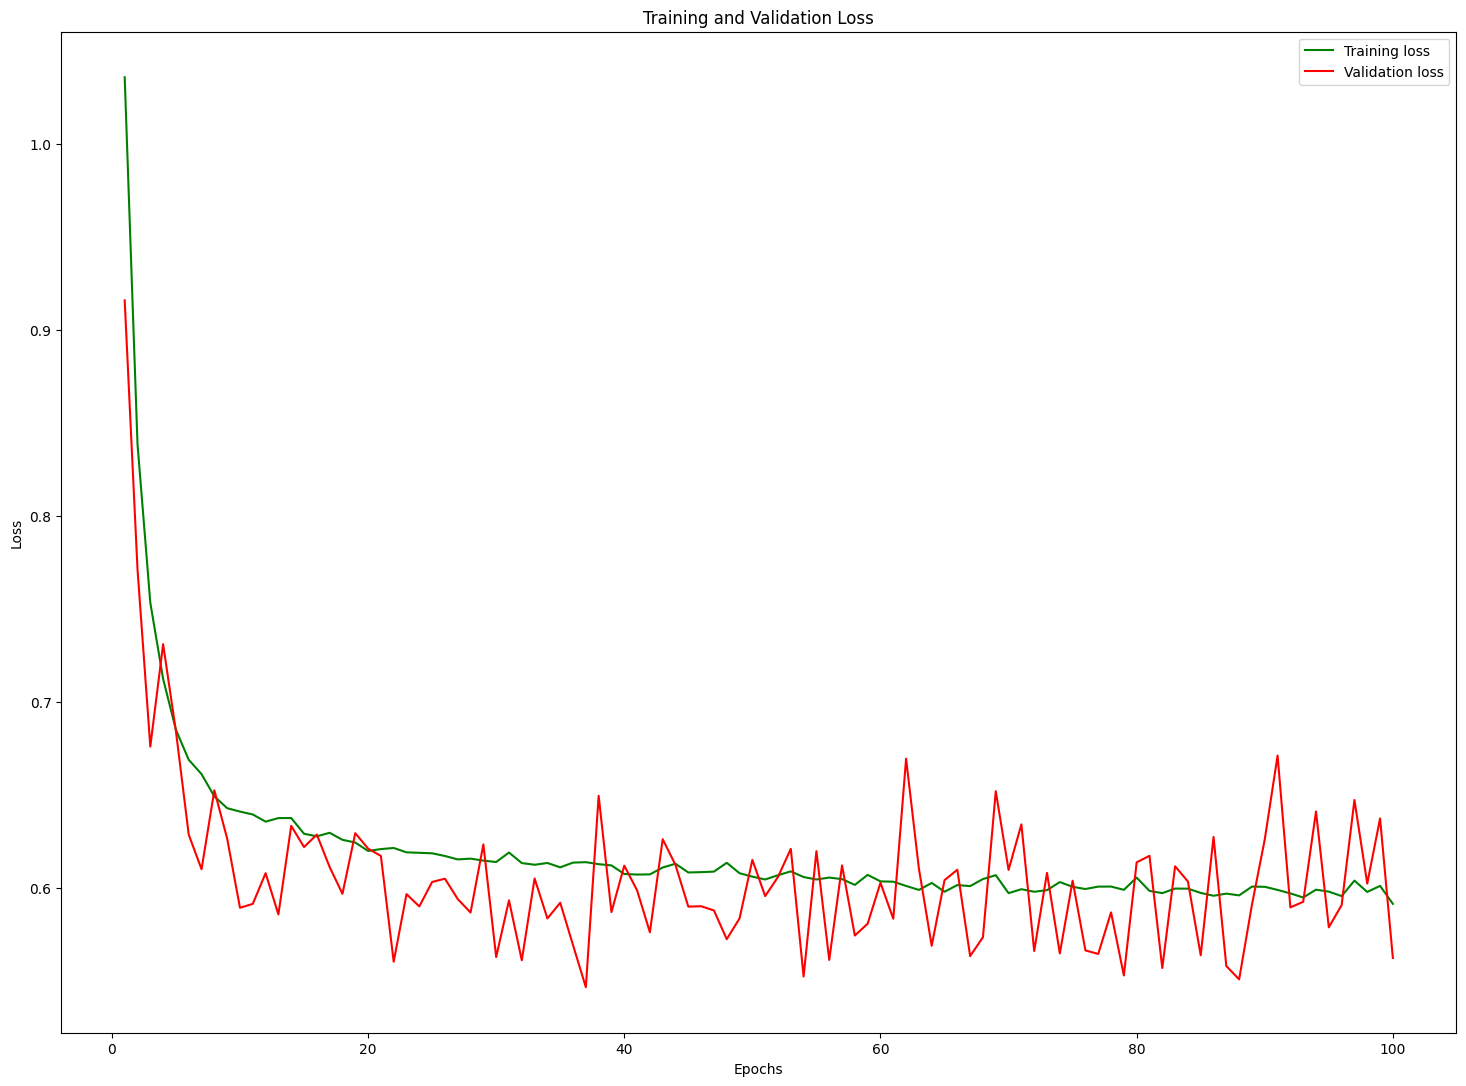

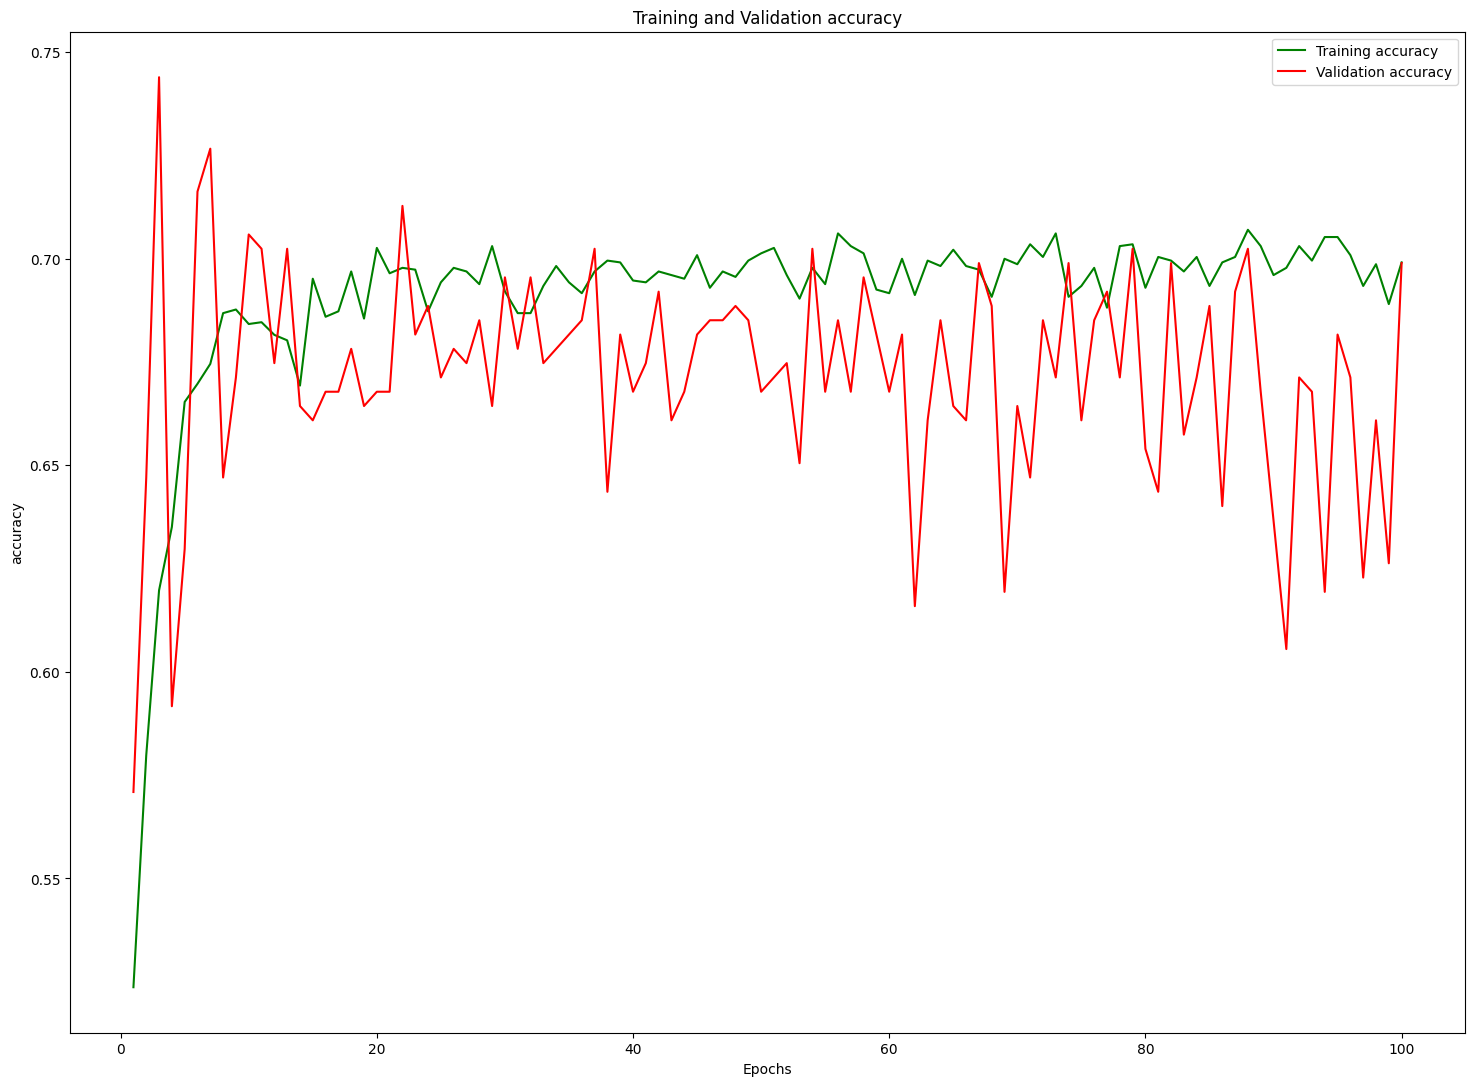

In [ ]:
#Evaluate model training before adding callbacks
plotTrainingProcess(history)
#Training accuracy has dropped after around 35 epochs. Model is potentially overfitting

In [ ]:
#Task 9: Implement Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
# Monitor 'val_loss' and stop training if it doesn't improve for 5 epochs
# Restore the best weights found during training
early_stopping_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

cp_callback = ModelCheckpoint(
    filepath='best_model_checkpoint.h5',
    monitor='val_accuracy',          # Quantity to monitor (e.g., 'val_accuracy', 'val_loss')
    save_best_only=True,         # Only save a new model if the monitored quantity improves
    mode='max',                  # The monitored quantity should be minimized (use 'max' for accuracy)
    verbose=1                    # Log a message each time a checkpoint is saved
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Metric to monitor
    factor=0.001,         # Factor to reduce LR by (new_lr = lr * factor)
    patience=5,         # Number of epochs with no improvement
    min_lr=0.00001,      # Lower bound on learning rate
    verbose=1
)

In [ ]:
model = baseline_model(12,0.001)
history1 = model.fit(Xts, yts, epochs=100, validation_data=(Xv, y_val), batch_size=10,
          callbacks=[early_stopping_callback,cp_callback, reduce_lr])

Epoch 1/100
223/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 1.0864
Epoch 1: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5365 - loss: 1.0847 - val_accuracy: 0.5744 - val_loss: 0.9083 - learning_rate: 0.0010
Epoch 2/100
223/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5986 - loss: 0.8637
Epoch 2: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5992 - loss: 0.8626 - val_accuracy: 0.7163 - val_loss: 0.7346 - learning_rate: 0.0010
Epoch 3/100
225/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6626 - loss: 0.7384
Epoch 3: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6621 - loss: 0.7383 - val_accuracy: 0.7093 - val_loss: 0.6849 - learning_rate: 0.0010
Epoch 4/100
216/228 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.6993
Epoch 4: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━

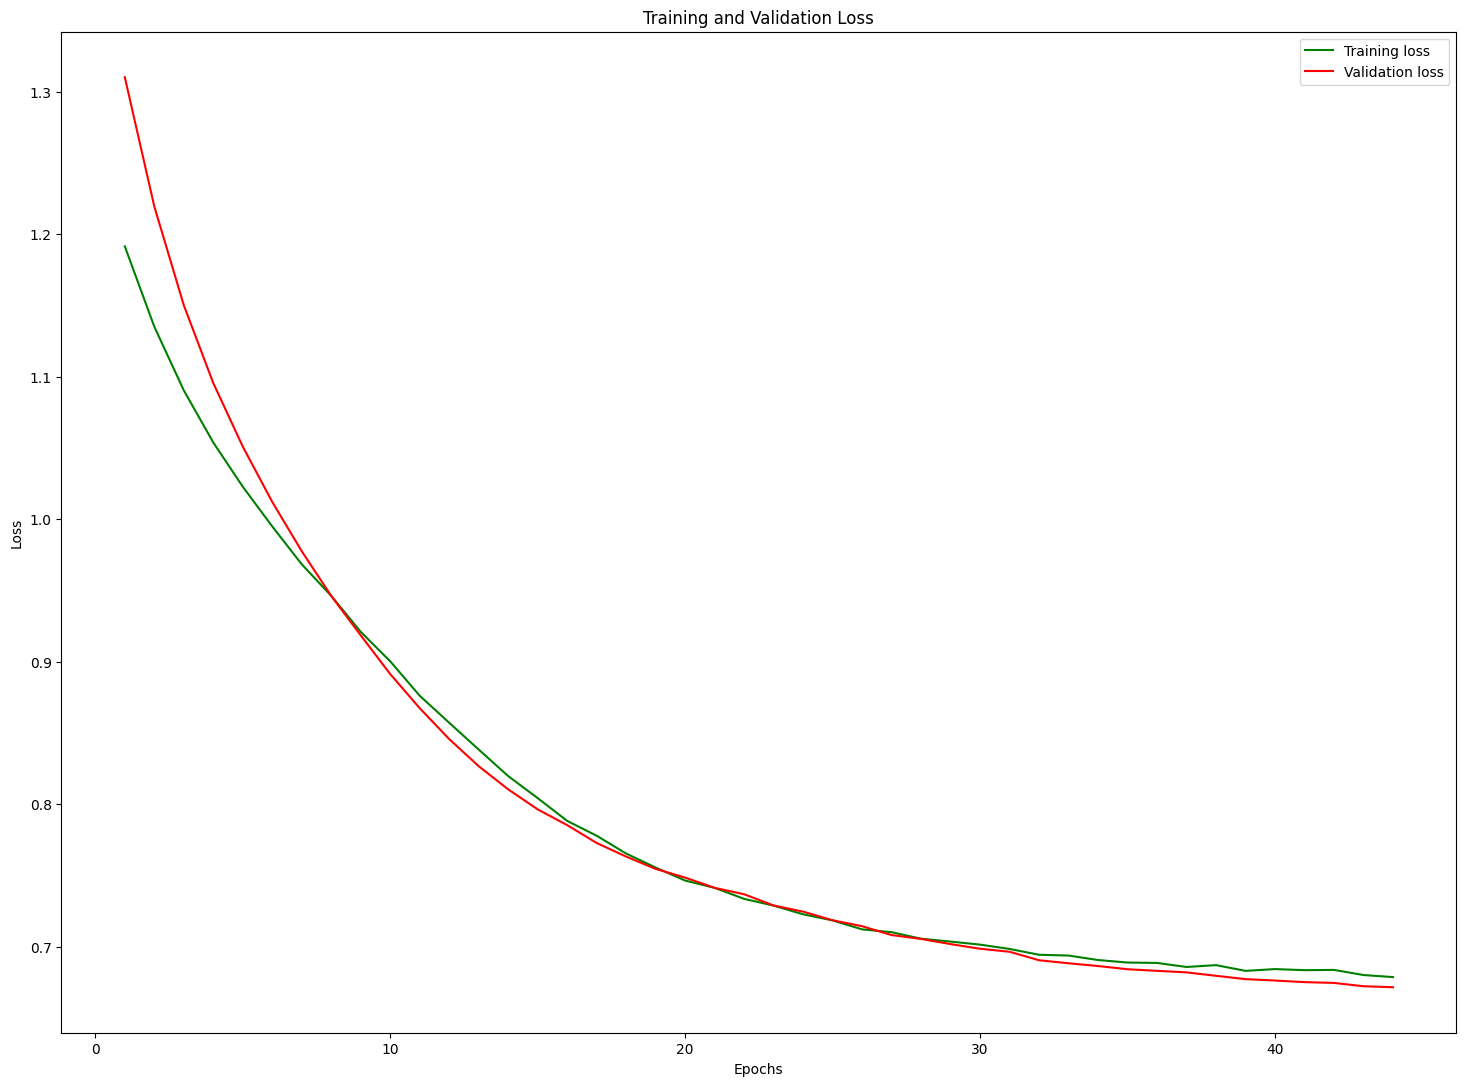

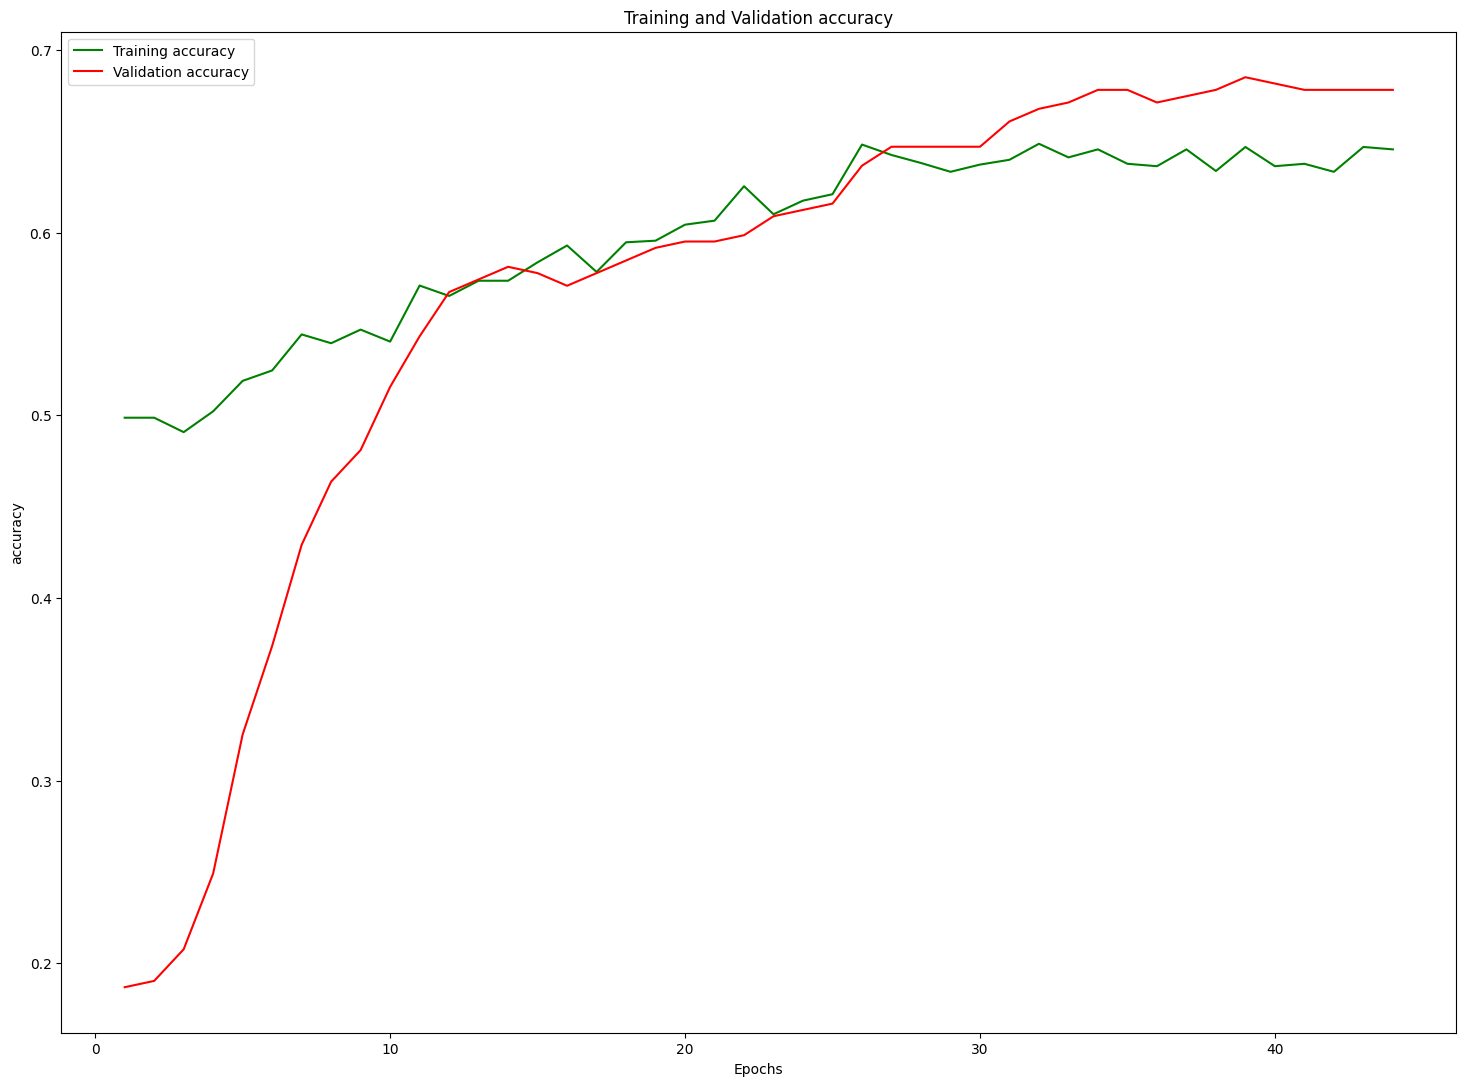

In [ ]:
#Task 10: Visualise the Training Process after adding callbacks:

plotTrainingProcess(history1)
#After adding callbacks, model overfitting has been avoided.

Epoch 1/100
212/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5349 - loss: 1.1134
Epoch 1: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5377 - loss: 1.1071 - val_accuracy: 0.7024 - val_loss: 0.8548 - learning_rate: 0.0010
Epoch 2/100
221/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6434 - loss: 0.8339
Epoch 2: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6431 - loss: 0.8329 - val_accuracy: 0.6713 - val_loss: 0.7451 - learning_rate: 0.0010
Epoch 3/100
212/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - loss: 0.7271
Epoch 3: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6714 - loss: 0.7266 - val_accuracy: 0.6920 - val_loss: 0.6844 - learning_rate: 0.0010
Epoch 4/100
222/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6695 - loss: 0.6978
Epoch 4: val_accuracy did not improve from 0.78547
228/228 ━━━━━━━━━━━━━━━━━

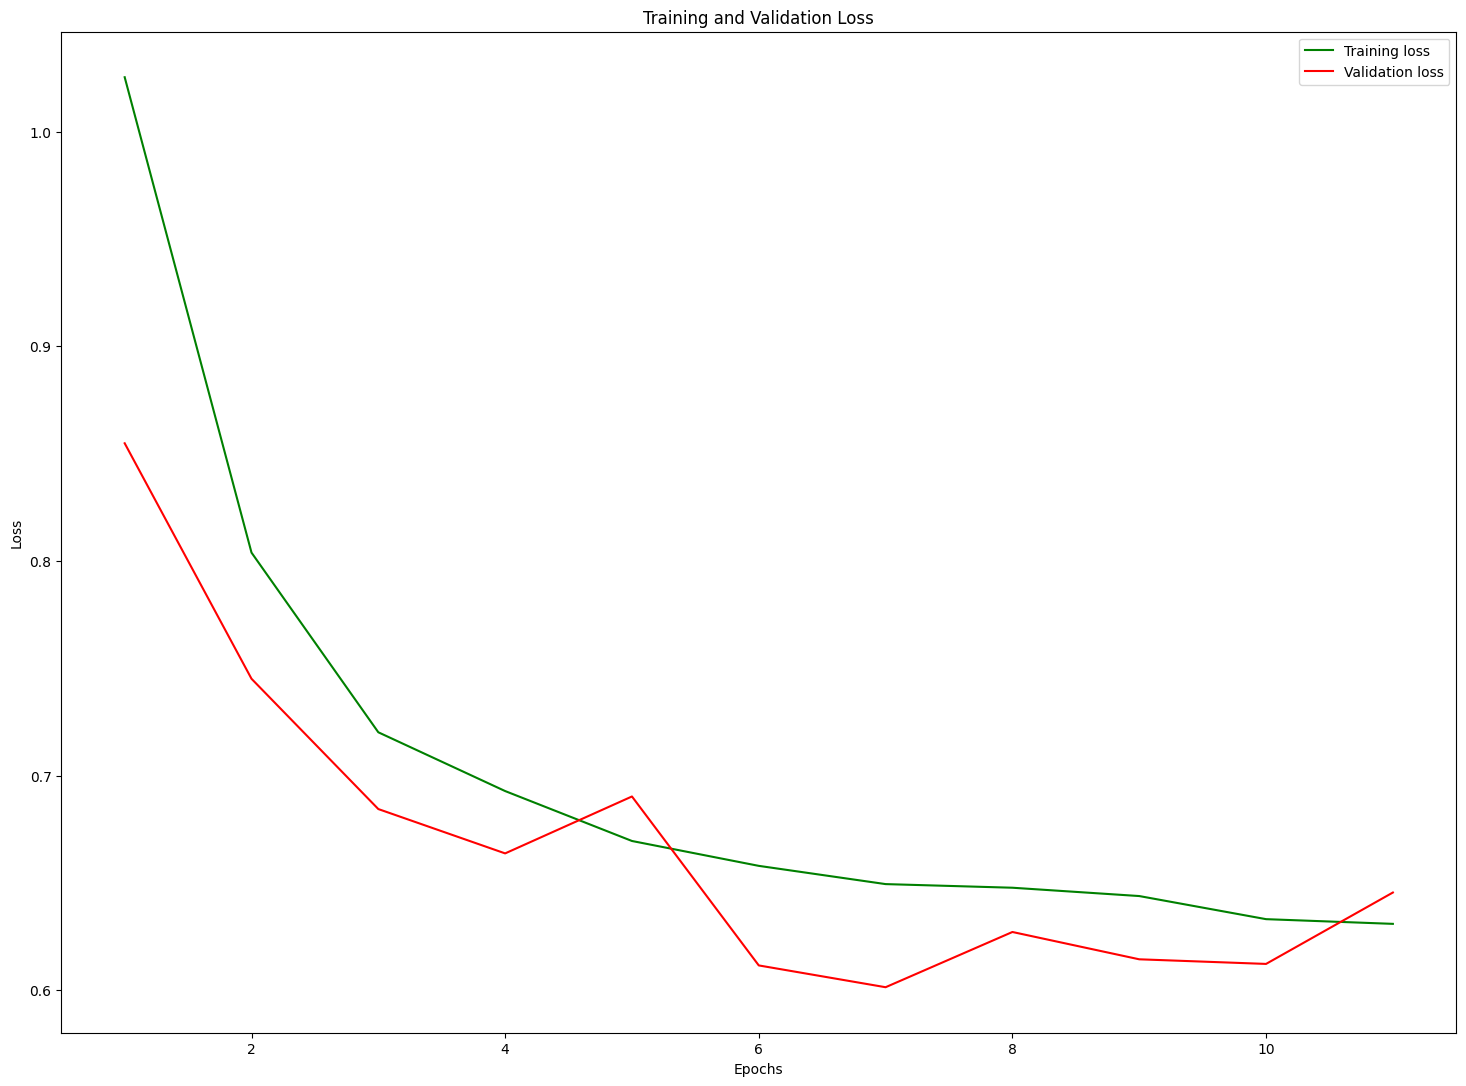

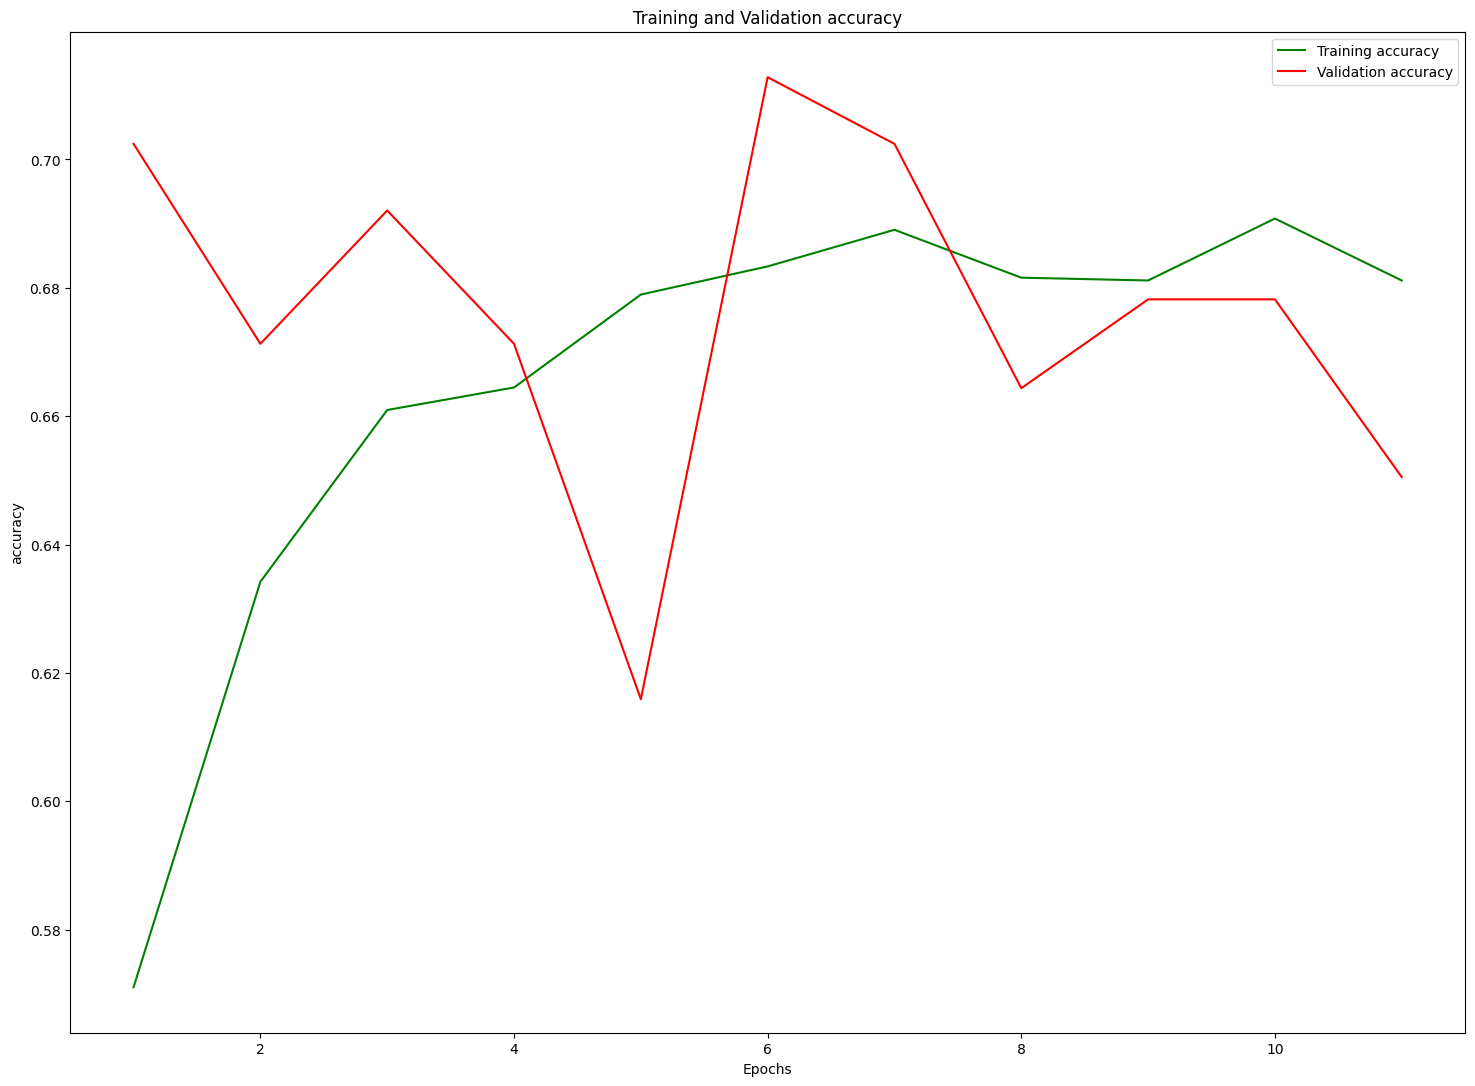

In [ ]:
#Task 11: Tune Hyperparameters - Adjust learning rate, batch size, or network architecture as needed.

model1 = baseline_model(filters=16, lr=0.001)
history2 = model1.fit(Xts, yts, epochs=100, validation_data=(Xv, y_val), batch_size=10,
          callbacks=[early_stopping_callback,cp_callback, reduce_lr])

# evaluate the keras model, training
results = model1.evaluate(Xts, yts)
print('Training Accuracy: %.2f' % (results[1]*100))

# evaluate the keras model, training
results = model1.evaluate(Xv, y_val)
print('Validation Accuracy: %.2f' % (results[1]*100))

plotTrainingProcess(history2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7087 - loss: 0.7392
Accuracy: 66.67
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

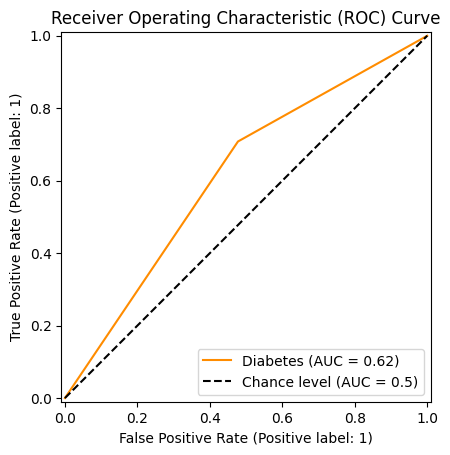

In [ ]:
#Task 12: Evaluate the Model on the Test Dataset:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

results = model.evaluate(Xtr, y_test)
print('Accuracy: %.2f' % (results[1]*100))

y_pred = model.predict(Xtr)
# round predictions
rounded = [round(x[0]) for x in y_pred]

print(rounded)

# Calculate individual metrics
accuracy = accuracy_score(y_test, rounded)
precision = precision_score(y_test, rounded) # Default for binary classification
recall = recall_score(y_test, rounded)       # Default for binary classification
f1 = f1_score(y_test, rounded)             # Default for binary classification
cm = confusion_matrix(y_test, rounded)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion matrix: {cm}")

RocCurveDisplay.from_predictions(y_test, rounded,
    name="Diabetes",
    color="darkorange",
    plot_chance_level=True)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
